In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sig
from scipy.stats import iqr
import math
from scipy.stats import pearsonr
from itertools import permutations
import pandas as pd
from scipy.signal import chebwin

In [2]:
label=['respiracion','ecg','emg','pulso']
via='/Users/josec/OneDrive/Documentos/MCIB-19-P/data/'
data= np.load(via+'acondicionada_orto.npz')
fs=int(data['sr'])
ts=1/fs
senales=[]
for i in label:
    senales.append(data[i][0:224640])
#z-score
zscore=[]
for i in range(len(senales)):
    zscore.append((senales[i][:]-np.mean(senales[i][:]))/np.std(senales[i][:]))

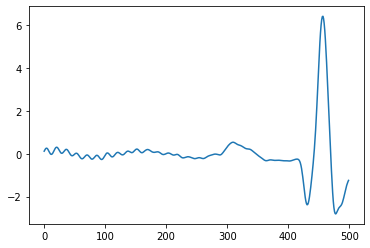

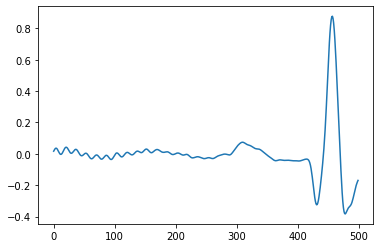

In [3]:
# rescalar -1 a 1
Nsignal=[]
for i in range (len(senales)):
    Nsignal.append(senales[i]/(max(abs(senales[i]))))    
#Comparacion de ecg con distintos reescalados    
plt.plot(zscore[1][0:500])
plt.figure()
plt.plot(Nsignal[1][0:500])
#Mascara para distinguir entre etapas basales y activas
mascara=np.zeros(len(senales[0]))
mascara[0:134476]=1
mascara[134477:152448]=2
mascara[152449:187228]=3
mascara[187229:224660]=4